In [2]:
!pip install xlsxwriter
import pandas as pd
import numpy as np
from google.colab import files
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statistics
import xlsxwriter
import random
import datetime
import time
import matplotlib.ticker as mtick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 8.6 MB/s 


In [3]:
file_name=files.upload()
name='LEI_deltas.csv'

Saving LEI_deltas.csv to LEI_deltas.csv


In [4]:
## Reading the file in 
df=pd.read_csv(name, sep=';')
rows=df.shape[0] #number of rows
columns=df.shape[1]  #number of columns
print(rows)
print (columns)
df.head()

600
10


,month,LEI,CEI,NBER,delta_1m_LEI,delta_3m_LEI,delta_6m_LEI,sign_delta_1m_LEI,sign_delta_3m_LEI,sign_delta_6m_LEI
0,Jul-72,50.3,39.5,expansion,0.011144,0.030760,0.054445,1,1,1
1,Ago-72,51.0,39.9,expansion,0.013917,0.028468,0.054423,1,1,1
2,Set-72,51.6,40.2,expansion,0.011765,0.025648,0.053431,1,1,1
3,Oct-72,52.0,40.7,expansion,0.007752,0.033797,0.055481,1,1,1
4,Nov-72,52.5,41.0,expansion,0.009615,0.029412,0.054356,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              600 non-null    object 
 1   LEI                600 non-null    float64
 2   CEI                600 non-null    float64
 3   NBER               600 non-null    object 
 4   delta_1m_LEI       600 non-null    float64
 5   delta_3m_LEI       600 non-null    float64
 6   delta_6m_LEI       600 non-null    float64
 7   sign_delta_1m_LEI  600 non-null    int64  
 8   sign_delta_3m_LEI  600 non-null    int64  
 9   sign_delta_6m_LEI  600 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 47.0+ KB


This dataset contains LEI and CEI values at the monthly level from July 1972 to June 2022 (expected, official value will be posted on July 21st ), the 1m, 3m and 6m changes and the sign for those changes (1 for positive, 0 for negative). The purpose of this analysis is to find associations between the magnitud of the changes and NBER determination of expansion and contraction periods. 

## Determine extremes of the distribution for all deltas 

In [14]:
## This will help visualize how the extremes are associated with NBER classification 
perc = [0.01, 0.025, 0.05, 0.95]
cat_columns = ['delta_1m_LEI', 'delta_3m_LEI', 'delta_6m_LEI']

# Loop through each column...
for column in cat_columns:
    for p in perc:  
        i= df[column].quantile(p) 
        _th=100*p
        percent=round(i*100, 2)
        print(f'The {_th} th quantile for {column} is {percent} %')
    print('\n')

The 1.0 th quantile for delta_1m_LEI is -2.48 %
The 2.5 th quantile for delta_1m_LEI is -1.76 %
The 5.0 th quantile for delta_1m_LEI is -1.26 %
The 95.0 th quantile for delta_1m_LEI is 1.11 %


The 1.0 th quantile for delta_3m_LEI is -6.38 %
The 2.5 th quantile for delta_3m_LEI is -4.49 %
The 5.0 th quantile for delta_3m_LEI is -3.33 %
The 95.0 th quantile for delta_3m_LEI is 2.77 %


The 1.0 th quantile for delta_6m_LEI is -9.8 %
The 2.5 th quantile for delta_6m_LEI is -7.57 %
The 5.0 th quantile for delta_6m_LEI is -6.26 %
The 95.0 th quantile for delta_6m_LEI is 5.35 %




## Plot the different deltas against the NBER classification

### Delta 1_m

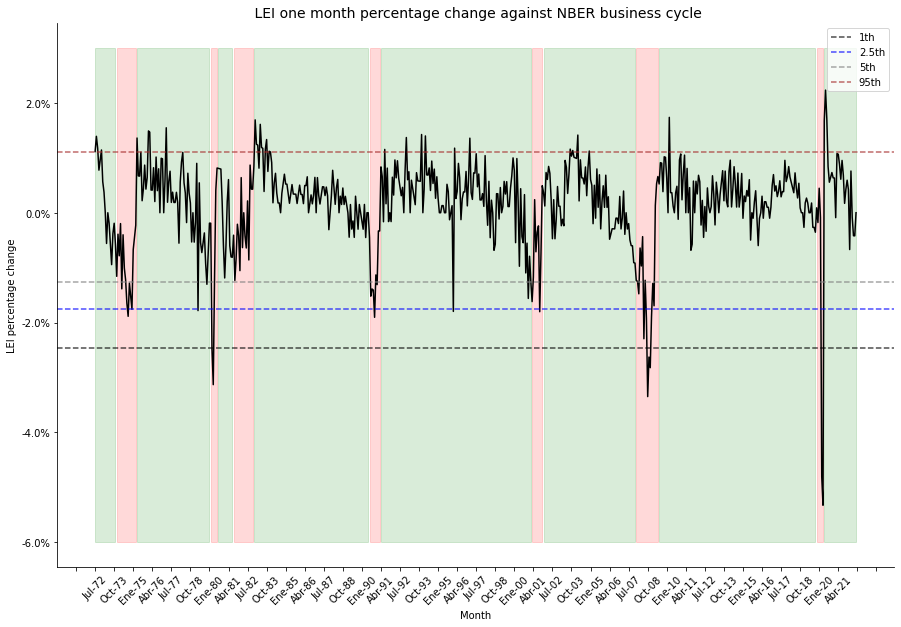

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
x = df['month']
y = df['delta_1m_LEI']*100
ax.plot(x, y, color='black')
w=ax.xaxis.set_major_locator(plt.MaxNLocator(60))## this only shows 60 of the 600 months
plt.xticks(w, rotation=45)
plt.xlabel('Month')
plt.ylabel('LEI percentage change')
plt.title(' LEI one month percentage change against NBER business cycle', size=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine()


threshold_1=-0.0247*100 ## at the 1th percentile
threshold_2=-0.0176*100 ## at the 2.5th percentile
threshold_3=-0.0126*100 ## at the 5th percentile
threshold_4= 0.011*100 ## at the 95th percentile
ax.axhline(threshold_1, color='black' , alpha=0.7, linestyle="--", label='1th')
ax.axhline(threshold_2, color='blue' , alpha=0.7, linestyle="--", label='2.5th')
ax.axhline(threshold_3, color='grey' , alpha=0.7, linestyle="--", label='5th' )
ax.axhline(threshold_4, color='brown' , alpha=0.7, linestyle="--", label='95th');
plt.legend()
 
ax.fill_between(x, -6, 3, where=df['NBER'] =="expansion",
               color='green', alpha=0.15 )
ax.fill_between(x, -6, 3, where=df['NBER']=="contraction",
               color='red', alpha=0.15 )
plt.show()
plt.savefig("One_month_LEI_delta.png");

There seems to be a pattern, with the largest decreases (at the 5th percentile) happening during recessions. However there are two notable exceptions in 1978 and 1996. Let's see if the other deltas confirm the pattern. 

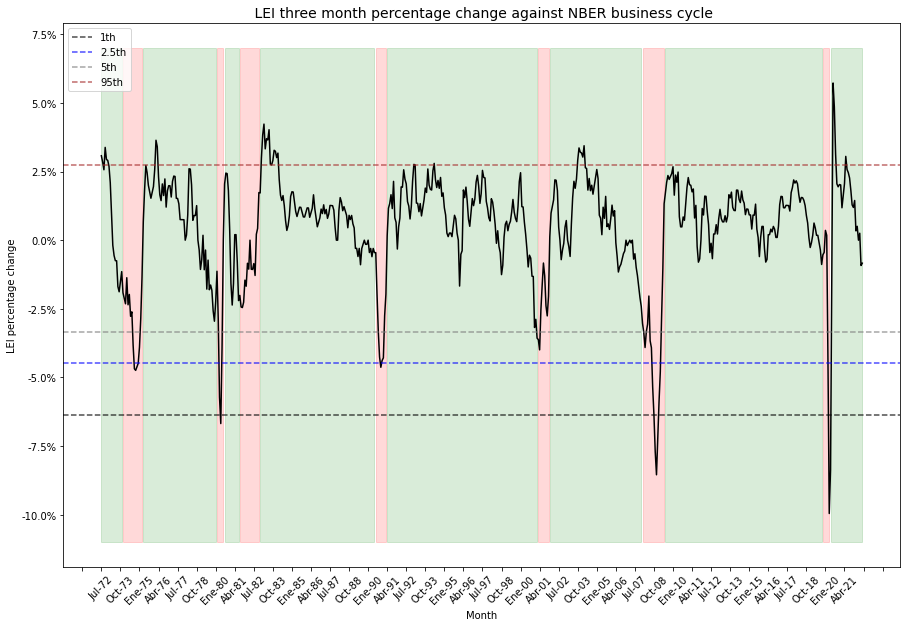

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
x = df['month']
y = df['delta_3m_LEI']*100
ax.plot(x, y, color='black')
w=ax.xaxis.set_major_locator(plt.MaxNLocator(60))
plt.xticks(w, rotation=45)
plt.xlabel('Month')
plt.ylabel('LEI percentage change')
plt.title(' LEI three month percentage change against NBER business cycle', size=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine

threshold_1=-0.0638*100
threshold_2=-0.0449*100
threshold_3=-0.0333*100
threshold_4= 0.0274*100
ax.axhline(threshold_1, color='black' , alpha=0.7, linestyle="--", label='1th')
ax.axhline(threshold_2, color='blue' , alpha=0.7, linestyle="--", label='2.5th')
ax.axhline(threshold_3, color='grey' , alpha=0.7, linestyle="--", label='5th' )
ax.axhline(threshold_4, color='brown' , alpha=0.7, linestyle="--", label='95th')
plt.legend()

 
ax.fill_between(x, -11, 7, where=df['NBER'] =="expansion",
               color='green', alpha=0.15 )
ax.fill_between(x, -11, 7, where=df['NBER'] =="contraction",
               color='red', alpha=0.15 )
plt.savefig("Three_month_LEI_delta.png")
plt.show();

The lowest points of the 3 month deltas, in the 5th percentile can be found during recessions, yet some of the deltas in recessions are not in the 5th percentile.  

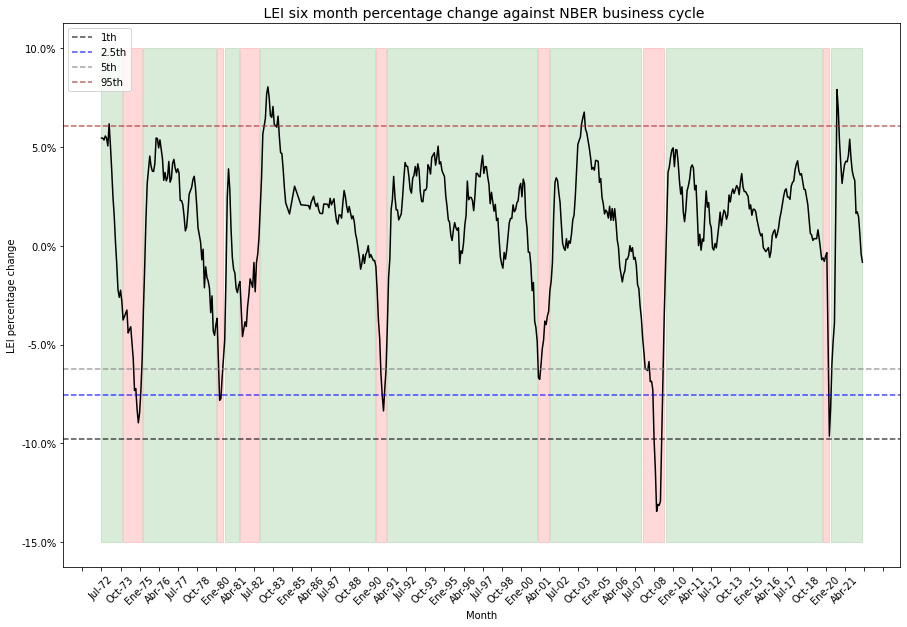

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
x = df['month']
y = df['delta_6m_LEI']*100
ax.plot(x, y, color='black')
w=ax.xaxis.set_major_locator(plt.MaxNLocator(60))
plt.xticks(w, rotation=45)
plt.xlabel('Month')
plt.ylabel('LEI percentage change')
plt.title(' LEI six month percentage change against NBER business cycle', size=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine


threshold_1=-0.098*100
threshold_2=-0.0757*100
threshold_3=-0.0626*100
threshold_4= 0.0607*100
ax.axhline(threshold_1, color='black' , alpha=0.7, linestyle="--", label='1th')
ax.axhline(threshold_2, color='blue' , alpha=0.7, linestyle="--", label='2.5th')
ax.axhline(threshold_3, color='grey' , alpha=0.7, linestyle="--", label='5th' )
ax.axhline(threshold_4, color='brown' , alpha=0.7, linestyle="--", label='95th')
plt.legend()

 
ax.fill_between(x, -15, 10, where=df['NBER'] =="expansion",
               color='green', alpha=0.15 )
ax.fill_between(x, -15, 10, where=df['NBER'] =="contraction",
               color='red', alpha=0.15 )
plt.savefig("Six_month_LEI_delta.png")
plt.show();

The six_month delta matches pretty well with recessions. The highest negative changes are all in the 5th percentile during recessions. Hence, a negative delta of 6.26% is sure to be happening during a recession. 